<img src="https://github.com/SanDiegoMachineLearning/bookclub/blob/master/images/graph.jpg?raw=true" width="160">

Links to the slides, videos, sample code, and other materials for the Meetup series about **Machine Learning with Graphs** is located in San Diego Machine Learning's GitHub book club repository:  https://github.com/SanDiegoMachineLearning/bookclub

# Traditional Methods for Machine Learning in Graphs

This core of this notebook came from sample code for the book **[Graph Machine Learning](https://www.amazon.com/dp/1800204493)** by Claudio Stamile et al.  These notebooks can be found at https://github.com/PacktPublishing/Graph-Machine-Learning.

## Introduction to the `networkx` package

Sample code is shown for many of the algorithms discussed in the *Traditinal Methods* session. 
The `networkx` package is well over a decade old and is used here for educational purposes. 
We have not tested the suitability of this package for production quality code on large graphs.

#### Installing packages
Uncomment the following code block to install the package versions recommended by the book

In [1]:
# !pip install networkx==2.5 
# !pip install matplotlib==3.2.2 
# !pip install pandas==1.1.3 
# !pip install scipy==1.6.2 

#### Helper Function to Plot Graphs

In [2]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Graph Basics

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#### Working with an Undirected Graph
For simplicity, we will show basic properties and operations on undirected graphs.  We start by creating a graph by specifying its nodes and edges.

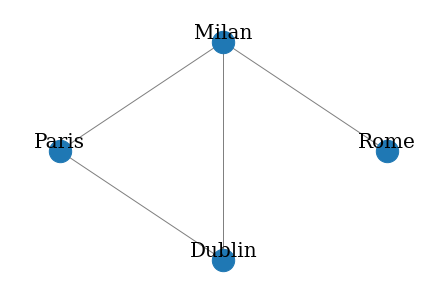

In [4]:
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [5]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan'), ('Rome', 'Milan')]


In [6]:
{G.degree(v): v for v in G.nodes}

{2: 'Dublin', 1: 'Rome', 3: 'Milan'}

In [7]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Paris': 2, 'Dublin': 2, 'Rome': 1, 'Milan': 3}
Neighbors for nodes: {'Paris': ['Milan', 'Dublin'], 'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome']}


Nodes: ['Paris', 'Dublin', 'Milan']
Edges: [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan')]


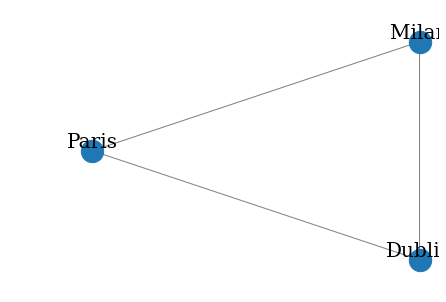

In [8]:
ego_graph_paris = nx.ego_graph(G, "Paris")
print(f"Nodes: {ego_graph_paris.nodes}")
print(f"Edges: {ego_graph_paris.edges}")
draw_graph(ego_graph_paris, pos_nodes=nx.shell_layout(G), node_size=500)

In [9]:
print('The adjacency matrix')
print(nx.to_pandas_adjacency(G))

The adjacency matrix
        Paris  Dublin  Rome  Milan
Paris     0.0     1.0   0.0    1.0
Dublin    1.0     0.0   0.0    1.0
Rome      0.0     0.0   0.0    1.0
Milan     1.0     1.0   1.0    0.0


In [10]:
sparse = nx.laplacian_matrix(G, nodelist=None, weight='weight')
print('The Laplacian matrix')
print(sparse.todense())

The Laplacian matrix
[[ 2 -1  0 -1]
 [-1  2  0 -1]
 [ 0  0  1 -1]
 [-1 -1 -1  3]]


You can modify a graph.  Below are some commands to add and remove nodes and edges.

In [11]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Dublin', 'Rome', 'Milan', 'London', 'Madrid']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Madrid'), ('Dublin', 'Milan'), ('Rome', 'Milan'), ('Rome', 'London')]


In [12]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan'), ('Rome', 'Milan')]


In [13]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Dublin', 'Rome', 'Milan']
E = [('Paris', 'Dublin'), ('Rome', 'Milan')]


In [14]:
print(nx.to_edgelist(G))

[('Paris', 'Dublin', {}), ('Rome', 'Milan', {})]


#### Directed Graph
Here are a few basics for working with directed graphs.

In [15]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan    Rome
        Paris  Dublin  Rome  Milan
Paris     0.0     1.0   0.0    1.0
Dublin    0.0     0.0   0.0    0.0
Rome      0.0     0.0   0.0    0.0
Milan     0.0     1.0   1.0    0.0


In [16]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Paris': 0, 'Dublin': 2, 'Rome': 1, 'Milan': 1}
Outegree for nodes: {'Paris': 2, 'Dublin': 0, 'Rome': 0, 'Milan': 2}


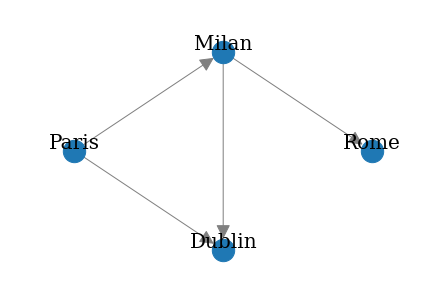

In [17]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

#### Weighted Directed Graph
You can also add weights to edges

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19
        Paris  Dublin  Rome  Milan
Paris     0.0    11.0   0.0    8.0
Dublin    0.0     0.0   0.0    0.0
Rome      0.0     0.0   0.0    0.0
Milan     0.0    19.0   5.0    0.0


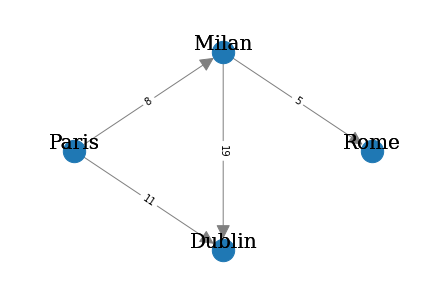

In [18]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

#### Bipartite Graph
Bipartite graphs have two different types of nodes, and all edges go between node types (never between two nodes of the same type).  They naturally arise in many situations, such as a graph of actors and the movies they appear in.  There are some special algorithms for bipartite graphs.

In [19]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

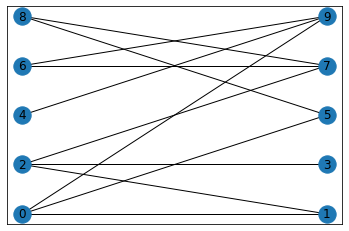

In [20]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Node Features

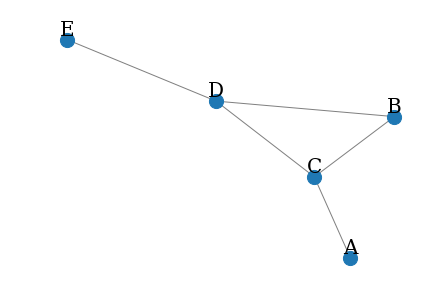

In [21]:
G = nx.Graph()
V = {'A','B','C','D','E'}
E = [('A','C'),('B','C'),('B','D'),('C','D'),('D','E')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.spring_layout(G), node_size=200)

### Centrality

In [22]:
scores = nx.degree_centrality(G)
print('Degree centrality scores')
print(scores)

print('Unscaled degree centrality scores')
print({key:value * (G.number_of_nodes() - 1) for (key, value) in scores.items()})

Degree centrality scores
{'E': 0.25, 'B': 0.5, 'D': 0.75, 'C': 0.75, 'A': 0.25}
Unscaled degree centrality scores
{'E': 1.0, 'B': 2.0, 'D': 3.0, 'C': 3.0, 'A': 1.0}


In [23]:
scores = nx.eigenvector_centrality(G)
print('Eigenvector centrality scores')
print(scores)

Eigenvector centrality scores
{'E': 0.24539962718618927, 'B': 0.49079832609417007, 'D': 0.5650995704550301, 'C': 0.5650995704550301, 'A': 0.24539962718618927}


In [24]:
scores = nx.betweenness_centrality(G)
print('Betweenness centrality scores')
print(scores)

Betweenness centrality scores
{'E': 0.0, 'B': 0.0, 'D': 0.5, 'C': 0.5, 'A': 0.0}


In [25]:
# The networkx closeness centrality scales all scores by N-1
# For our 5-node graph, it multiplies by 4, 
#   so these are all 4 times the values in the slide presentation
scores = nx.closeness_centrality(G)
print('Closeness centrality scores')
print(scores)

print('Unscaled closeness centrality scores')
print({key:value / (G.number_of_nodes() - 1) for (key, value) in scores.items()})

Closeness centrality scores
{'E': 0.5, 'B': 0.6666666666666666, 'D': 0.8, 'C': 0.8, 'A': 0.5}
Unscaled closeness centrality scores
{'E': 0.125, 'B': 0.16666666666666666, 'D': 0.2, 'C': 0.2, 'A': 0.125}


### Clustering coefficient

In [26]:
scores = nx.clustering(G)
print('Clustering coefficient scores')
print(scores)

Clustering coefficient scores
{'E': 0, 'B': 1.0, 'D': 0.3333333333333333, 'C': 0.3333333333333333, 'A': 0}


### Graphlet degree vector
I did not find an implementation of graphlet degree vector 

## Link Prediction

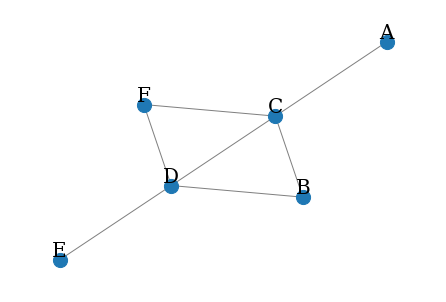

In [27]:
G = nx.Graph()
V = {'A','B','C','D','E'}
E = [('A','C'),('B','C'),('B','D'),('C','D'),('D','E'),('C','F'),('D','F')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.spring_layout(G), node_size=200)

### Shortest path

In [28]:
print('Shortest path lengths between pairs of nodes')
for x in nx.shortest_path_length(G):
    print(x)

Shortest path lengths between pairs of nodes
('E', {'E': 0, 'D': 1, 'C': 2, 'B': 2, 'F': 2, 'A': 3})
('B', {'B': 0, 'D': 1, 'C': 1, 'A': 2, 'E': 2, 'F': 2})
('D', {'D': 0, 'C': 1, 'E': 1, 'B': 1, 'F': 1, 'A': 2})
('C', {'C': 0, 'D': 1, 'F': 1, 'A': 1, 'B': 1, 'E': 2})
('A', {'A': 0, 'C': 1, 'D': 2, 'F': 2, 'B': 2, 'E': 3})
('F', {'F': 0, 'D': 1, 'C': 1, 'A': 2, 'E': 2, 'B': 2})


### Jaccard coefficient

In [29]:
print('Jaccard coefficient for edges not present in graph')
for x in nx.jaccard_coefficient(G):
    print(x)

Jaccard coefficient for edges not present in graph
('A', 'D', 0.25)
('A', 'E', 0.0)
('A', 'B', 0.5)
('A', 'F', 0.5)
('E', 'F', 0.5)
('E', 'B', 0.5)
('E', 'C', 0.25)
('F', 'B', 1.0)


### Adamic-Adar index

In [30]:
print('Adamic-Adar index for edges not present in graph')
for x in nx.adamic_adar_index(G):
    print(x)

Adamic-Adar index for edges not present in graph
('A', 'D', 0.7213475204444817)
('A', 'E', 0)
('A', 'B', 0.7213475204444817)
('A', 'F', 0.7213475204444817)
('E', 'F', 0.7213475204444817)
('E', 'B', 0.7213475204444817)
('E', 'C', 0.7213475204444817)
('F', 'B', 1.4426950408889634)


### Katz index
I modified some code I found on [Stack Overflow](https://stackoverflow.com/questions/62069781/how-to-find-the-similarity-between-pair-of-vertices-using-katz-index-in-python)

In [31]:
import numpy as np
from numpy.linalg import inv

# Create identity matrix
I = np.identity(len(G.nodes)) 

# Calculate highest eigenvector
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))

# Set beta to scale largest eigenvector to be 0.5
beta = 1/(max(e) * 2)

#Katz index
print('Katz index matrix for beta ', beta)
print(inv(I - (nx.to_numpy_array(G)*beta)) - I)


Largest eigenvalue: 1.7500000000000002
Katz index matrix for beta  0.2857142857142857
[[0.16723164 0.26666667 0.58531073 0.3480226  0.09943503 0.26666667]
 [0.26666667 0.53333333 0.93333333 0.93333333 0.26666667 0.53333333]
 [0.58531073 0.93333333 1.04858757 1.2180791  0.3480226  0.93333333]
 [0.3480226  0.93333333 1.2180791  1.04858757 0.58531073 0.93333333]
 [0.09943503 0.26666667 0.3480226  0.58531073 0.16723164 0.26666667]
 [0.26666667 0.53333333 0.93333333 0.93333333 0.26666667 0.53333333]]


## Graph-level features

### Weisfeiler-Lehman kernel

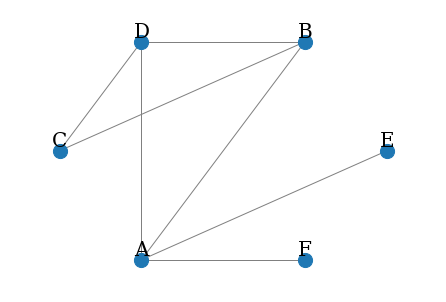

In [32]:
G1 = nx.Graph()
V = {'A','B','C','D','E','F'}
E = [('A','B'),('A','D'),('A','E'),('A','F'),('B','C'),('B','D'),('C','D')]
G1.add_nodes_from(V)
G1.add_edges_from(E)
draw_graph(G1, pos_nodes=nx.circular_layout(G), node_size=200)

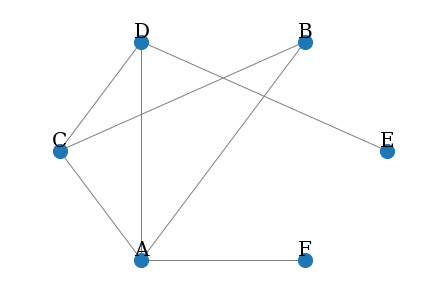

In [33]:
G2 = nx.Graph()
V = {'A','B','C','D','E','F'}
E = [('A','B'),('A','C'),('A','D'),('A','F'),('B','C'),('C','D'),('D','E')]
G2.add_nodes_from(V)
G2.add_edges_from(E)
draw_graph(G2, pos_nodes=nx.circular_layout(G), node_size=200)

The `networkx` implementation seems to hash the histogram, so it's hard to show the same info as the slides

This implementation is useful for trying identifying isomorphic graphs, but not sure how to use it to measure similarity

In [34]:
print('G1:', nx.weisfeiler_lehman_graph_hash(G1, iterations=4, digest_size=13))
print('G2:', nx.weisfeiler_lehman_graph_hash(G2, iterations=4, digest_size=13))

G1: cd6cd4454f1669731109aebe3d
G2: c994ab690274ed5ccee46d903a
